# <center>Ejercicio práctico pandas<center/>

#Ejercicio recomendador

## Sistema de recomendaciones basico usando Pandas 

La idea de este ejercicio practico es desarrollar un corto script que permite hacer recomendaciones de peliculas de acuerdo con
la calificacion y a la popularidad de una pelicula.

En primer lugar cargue los datasets "ratings.csv" y "movies.csv" en respectivos dataframes de pandas

Haga una exploracion visual de los dataframes, ¿qué columnas contienen?, ¿qué datos parecen relevantes?, 
¿se observa alguna columna en común entre ambos dataframes?

La recomendacion que se va aimplementar es de acuerdo a la popularidad y calificacion de las peliculas, sin embargo como se pudo observar, 
las calificaciones (ratings) y el nombres de la peliculas están en dataframes distintos. Entonces es necesario que combine los dataframe en uno solo,
de modo que se se tengan estas dos columnas en un único dataframe. Aprovechando la existencia de una columna en común utilice la función merge para
fusionar los dataframes en un nuevo dataframe.

Es muy común encontrar en estos datasets películas con altas calificaciones (ratings), lo que sin embargo no es prenda de garantía de que la 
película sea popular. Puede darse que una película con calificacion de 5 hecha por un solo cinefilo tenga por tanto una calificación promedio de 5
Obtenga y visualice las calificaciones (ratings) promedio de las películas del dataframe, agrupelas por título y organice los promedios
en orden descendente. Utilice las funciones groupby, mean y sort_values.

Para medir la popularidad de una película es necesario no solo la calificación, sino saber cuántos cinefilos la han calificado, las películas mas populares
son por lo general las que reciben más y mejores calificaciones de parte de los cinefilos. Agrupe las películas por título y obtenga en orden 
descendente el número de calificaciones para cada película del dataframe

Ahora implemente un nuevo dataframe cuyas columnas sean la calificación promedio de las películas 'promedio_rating' y la cantidad de calificaciones 'numero_califs'
que ha recibido la película. Utilice las operaciones que recien puso en práctica para medir esas mismos parámetros

Compruebe visualmente o estadísticamente que las películas con más calificaciones son también las películas con el promedio más alto de calificación.
Seleccione una de las peliculas que se obtengan en esta instancia, preferiblemente la primera de la lista (la de más votos y mejor calificación), 
con base en esta película se va hacer la recomendacion de otras películas similares en popularidad (calificación y votaciones)

Implemente un nuevo dataframe donde el índice (de las filas) sea la columna 'userID', los nombres de las columnas sean los títulos de las películas
(columna title) y los valores del dataframe sean las calificaciones individuales que cada cinefilo ha dado a las películas (columna rating), todos esos
datos los puede tomar del dataframe que resultó de mezclar con la función merge los dataframes obtenidos al leer los datasets.
Puede utilizar las funciones pivot o pivot_table

Ahora viene la parte interesante para la implementación de la recomendación. Esta recomendación se va hacer por un criterio de similitud entre
características de las películas, en este caso la característica general que escogimos fue la popularidad de la película que se concluye de dos
caracerísticas presentes en los datasets: el número de votos de los cinefilos y la calificación de la película.
Vamos a aprovechar el criterio de similitud entre vectores y matrices que se obtiene al aplicar el método de similaridad cosenoidal
(cosine similarity) del cual puede enterarse más en el siguiente enlace: 
http://blog.christianperone.com/2013/09/machine-learning-cosine-similarity-for-vector-space-models-part-iii/

Obtenga una serie cuya única columna sean las calificaciones que los cinefilos dieron a la película más popular (la que usted seleccionó luego de
la comprobación visual y/o estadística). Esa serie la puede obtener extrayendo la columna etiquetada por el título de la película seleccionada del 
útimo dataframe construido con la función pivot.

Ahora se va calcular la similaridad de la película seleccionada con el resto de películas del dataset, para esto debe realizarse una correlación entre
la serie recien obtenida (que contiene las calificaciones de los cinefilos a esa película) y el último dataframe construido con la función pivot (Este
contiene las calificaciones de los cinefilos para todas las películas). Para la correlación utilice la función corrwith

Construya un nuevo dataframe a partir de la serie obtenida tras la correlación y a la única columna llamela 'Correlaciones'
Limpie todos los valores NaN (nan). Función dropna 

A este último dataframe debe añadirle la columna del dataframe donde se registraron la cantidad de calificaciones por pelicula ('numero_califs')
Utilice la función join.

Ahora visualice las películas que se deben recomendar. Son las peliculas con un número de calificaciones mayores al percentil 60 del número total de 
calificaciones por película ('numero_califs') y ordenadas en orden descendente de la columna 'Correlaciones'. Es preferible construir un nuevo dataframe
a partir del último que se obtuvo.

In [3]:
#!dir
import pandas as pd

### Observar peliculas

In [4]:
movies = pd.read_csv("movies.csv")
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


### Observar Ratings

In [5]:
ratings = pd.read_csv("ratings.csv")
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


### Reorganizar por columna movieId

In [6]:
ratings= ratings.sort_values(by= 'movieId', ascending=True)
ratings.head()

,userId,movieId,rating,timestamp
9713,68,1,4.0,1194741818
35933,261,1,1.5,1101665532
52631,383,1,5.0,852806429
35983,262,1,2.5,1433898798
12038,77,1,4.0,1163005363


### Combinación de peliculas y sus ratings

In [7]:
moviesRatAll = pd.merge(movies, ratings, how= 'left', on='movieId')

In [8]:
moviesRatAll.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,68.0,4.0,1.194742e+09
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,261.0,1.5,1.101666e+09
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,383.0,5.0,8.528064e+08
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,262.0,2.5,1.433899e+09
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,77.0,4.0,1.163005e+09


### Ordenar con respecto a su rating

In [9]:
moviesRatAll = moviesRatAll.sort_values(by='rating', ascending=False)

In [10]:
moviesRatAll.head()

,movieId,title,genres,userId,rating,timestamp
100060,163949,The Beatles: Eight Days a Week - The Touring Y...,Documentary,547.0,5.0,1.476419e+09
22073,858,"Godfather, The (1972)",Crime|Drama,520.0,5.0,1.142025e+09
22083,858,"Godfather, The (1972)",Crime|Drama,340.0,5.0,1.410253e+09
63274,3510,Frequency (2000),Drama|Thriller,51.0,5.0,9.747288e+08
22081,858,"Godfather, The (1972)",Crime|Drama,580.0,5.0,1.155486e+09


### Agrupar por Pelicula (Mostrar grupo)

In [11]:
moviesRatGroup = moviesRatAll.groupby('movieId')
moviesRatGroup.get_group(1).head()

,movieId,title,genres,userId,rating,timestamp
240,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,466.0,5.0,9.448923e+08
241,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,146.0,5.0,1.256071e+09
246,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,201.0,5.0,1.110422e+09
233,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,334.0,5.0,1.447032e+09
227,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,597.0,5.0,9.407086e+08


### Sacar promedio de raiting

In [12]:
moviesRat =   moviesRatGroup.agg({'rating':'mean'})

In [13]:
moviesRat.sort_values(by='rating', ascending=False).head()

,rating
movieId,
163949,5.0
71180,5.0
51471,5.0
52617,5.0
53887,5.0


### Contar el numero de usuarios por pelicula

In [14]:
userCount =   moviesRatGroup.agg({'userId':'count'})
userCount.head()

,userId
movieId,
1,247
2,107
3,59
4,13
5,56


## Mezclar peliculas y numero de usuarios

In [15]:
moviesUsers = pd.merge(moviesRat, userCount, how= 'left', on='movieId').rename(columns={'rating':'promedio_rating',
                                                                                       'userId': 'numero_califs'})

## Visialización de los datos

In [16]:
viewGraph = moviesUsers.sort_values(by='numero_califs', ascending=False).head(30)

pd.merge(moviesUsers, movies[['movieId','title']], how= 'left',
         on='movieId').sort_values(by='numero_califs', ascending=False).head(10)

,movieId,promedio_rating,numero_califs,title
321,356,4.054252,341,Forrest Gump (1994)
266,296,4.256173,324,Pulp Fiction (1994)
284,318,4.487138,311,"Shawshank Redemption, The (1994)"
525,593,4.138158,304,"Silence of the Lambs, The (1991)"
232,260,4.221649,291,Star Wars: Episode IV - A New Hope (1977)
427,480,3.706204,274,Jurassic Park (1993)
2062,2571,4.183398,259,"Matrix, The (1999)"
0,1,3.872470,247,Toy Story (1995)
472,527,4.303279,244,Schindler's List (1993)
522,589,4.006329,237,Terminator 2: Judgment Day (1991)


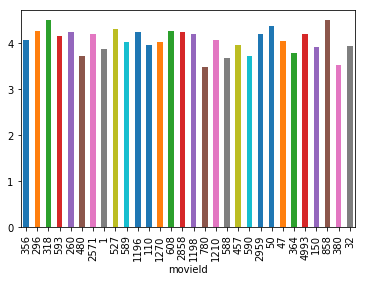

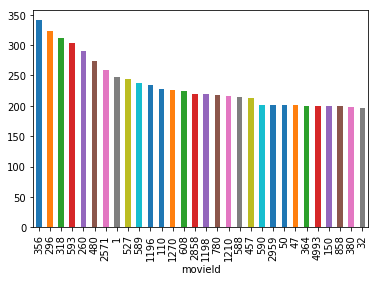

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline 
viewGraph['promedio_rating'].plot(kind='bar')
plt.figure(2)
viewGraph['numero_califs'].plot(kind='bar')
plt.show()

## Matriz usuarios, peliculas

In [18]:
matrixMoviesUser = moviesRatAll.pivot_table(index='userId', columns='title', values='rating', aggfunc='mean')

#Visualización de algunas peliculas
matrixMoviesUser = matrixMoviesUser.sort_values(by='Forrest Gump (1994)', ascending=False)
matrixMoviesUser[['Forrest Gump (1994)','Pulp Fiction (1994)','Shawshank Redemption, The (1994)',
                 'Silence of the Lambs, The (1991)','Star Wars: Episode IV - A New Hope (1977)']].head(10)

title,Forrest Gump (1994),Pulp Fiction (1994),"Shawshank Redemption, The (1994)","Silence of the Lambs, The (1991)",Star Wars: Episode IV - A New Hope (1977)
userId,,,,,
671.0,5.0,4.0,5.0,NaN,5.0
143.0,5.0,4.0,4.5,4.5,NaN
163.0,5.0,3.0,5.0,4.5,4.0
336.0,5.0,NaN,NaN,NaN,5.0
160.0,5.0,NaN,5.0,3.0,NaN
339.0,5.0,NaN,5.0,NaN,3.0
340.0,5.0,3.5,5.0,NaN,NaN
151.0,5.0,5.0,NaN,NaN,NaN
344.0,5.0,4.0,5.0,5.0,5.0


## Correlación Coseno 'Forrest Gump (1994)'

In [19]:
corr = matrixMoviesUser.drop(labels='Forrest Gump (1994)', axis=1).corrwith(matrixMoviesUser['Forrest Gump (1994)'])
corr = corr.dropna()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3175: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3109: RuntimeWarning: divide by zero encountered in double_scalars
  c *= 1. / np.float64(fact)


In [20]:
corr = corr.to_frame(name='Correlaciones')
moviesUsersTitles = pd.merge(moviesUsers, movies[['movieId','title']], how= 'left',
         on='movieId')

moviesUsersTitlesCorr = pd.merge(moviesUsersTitles, corr, how= 'inner', on='title')



In [21]:
moviesUsersTitlesCorr.head()

,movieId,promedio_rating,numero_califs,title,Correlaciones
0,1,3.872470,247,Toy Story (1995),0.180460
1,2,3.401869,107,Jumanji (1995),0.247623
2,3,3.161017,59,Grumpier Old Men (1995),0.262033
3,4,2.384615,13,Waiting to Exhale (1995),-0.232076
4,5,3.267857,56,Father of the Bride Part II (1995),0.079611


## Umbral del percentil 60

In [24]:
umbral = moviesUsersTitlesCorr['numero_califs'].quantile(.6)
print(umbral)
recomend = moviesUsersTitlesCorr[moviesUsersTitlesCorr['numero_califs'] >= umbral]

11.0


## <center>Recomendacion de las 10 primeras peliculas</center>

In [23]:
recomend.sort_values(by=['Correlaciones','numero_califs'], ascending=False).head(10)

,movieId,promedio_rating,numero_califs,title,Correlaciones
2660,4639,2.607143,14,America's Sweethearts (2001),0.891856
3026,5878,3.906250,16,Talk to Her (Hable con Ella) (2002),0.886457
2452,4041,3.454545,11,"Officer and a Gentleman, An (1982)",0.881131
2153,3484,2.636364,11,"Skulls, The (2000)",0.855738
4004,48043,3.125000,12,"Fountain, The (2006)",0.845795
242,322,3.642857,14,Swimming with Sharks (1995),0.834266
1539,2433,3.157895,19,"Civil Action, A (1998)",0.826472
2187,3543,3.977273,22,Diner (1982),0.815796
1587,2501,4.100000,35,October Sky (1999),0.814027
4744,96610,3.500000,20,Looper (2012),0.805017
